# Lesson 3 Exercise 3: Focus on Clustering Columns

### Walk through the basics of creating a table with a good Primary Key and Clustering Columns in Apache Cassandra, inserting rows of data, and doing a simple CQL query to validate the information. 

### Remember, replace ##### with your own code.

Note: __Do not__ click the blue Preview button in the lower task bar

#### We will use a python wrapper/ python driver called cassandra to run the Apache Cassandra queries. This library should be preinstalled but in the future to install this library you can run this command in a notebook to install locally: 
! pip install cassandra-driver
#### More documentation can be found here:  https://datastax.github.io/python-driver/

#### Import Apache Cassandra python package

In [1]:
import cassandra

### Create a connection to the database

In [2]:
from cassandra.cluster import Cluster
try: 
    cluster = Cluster(['127.0.0.1']) #If you have a locally installed Apache Cassandra instance
    session = cluster.connect()
except Exception as e:
    print(e)

### Create a keyspace to work in 

In [3]:
try:
    session.execute("""
    CREATE KEYSPACE IF NOT EXISTS udacity 
    WITH REPLICATION = 
    { 'class' : 'SimpleStrategy', 'replication_factor' : 1 }"""
)

except Exception as e:
    print(e)

#### Connect to the Keyspace. Compare this to how we had to create a new session in PostgreSQL.  

In [4]:
try:
    session.set_keyspace('udacity')
except Exception as e:
    print(e)

### Imagine we would like to start creating a new Music Library of albums. 

### We want to ask 1 question of our data:
### 1. Give me all the information from the music library about a given album
`select * from album_library WHERE album_name="Close To You"`

### Here is the data:
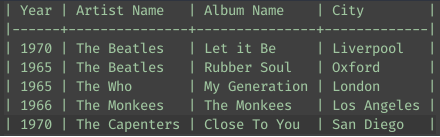

### How should we model this data? What should be our Primary Key and Partition Key? 

In [5]:
query = """
CREATE TABLE music_library 
(year int, artist_name varchar, album_name varchar, city varchar, PRIMARY KEY (album_name, artist_name))
"""
try:
    session.execute(query)
except Exception as e:
    print(e)

### Insert data into the table

In [6]:
## You can opt to change the sequence of columns to match your composite key. \ 
## If you do, make sure to match the values in the INSERT statement

def insert_album(year, artist_name, album_name, city):
    query = """
    INSERT INTO music_library
    (year, artist_name, album_name, city)
    VALUES (%s, %s, %s, %s)
    """
    try:
        session.execute(query, (year, artist_name, album_name, city))
    except Exception as e:
        print(e)

insert_album(1970, "The Beatles", "Let it Be", "Liverpool")
insert_album(1965, "The Beatles", "Rubber Soul", "Oxford")
insert_album(1964, "The Beatles", "Beatles For Sale", "London")
insert_album(1966, "The Monkees", "The Monkees", "Los Angeles")
insert_album(1970, "The Carpenters", "Close To You", "San Diego")

### Validate the Data Model -- Did it work? 
`select * from album_library WHERE album_name="Close To You"`

In [7]:
query = "select * from music_library WHERE album_name='Close To You'"
try:
    rows = session.execute(query)
except Exception as e:
    print(e)
    
for row in rows:
    print (row.artist_name, row.album_name, row.city, row.year)

The Carpenters Close To You San Diego 1970


### Your output should be:
('The Carpenters', 'Close to You', 'San Diego', 1970)

### OR
('The Carpenters', 'Close to You', 1970, 'San Diego') 

### Drop the table

In [8]:
query = "drop table music_library"
try:
    rows = session.execute(query)
except Exception as e:
    print(e)

### Close the session and cluster connection

In [9]:
session.shutdown()
cluster.shutdown()